# User items (EDA)


The following notebook shows an exploratory data analysis using the data from the user items (after subjecting such file to some transformations and a cleaning process). 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from etl_functions import general_information

In [2]:
df=pd.read_csv("cleaned_data/items_cleaned.csv")

In [3]:
df.head(5)

,item_id,user_id,hours_game
0,10,76561197970982479,0.10
1,30,76561197970982479,0.12
2,300,76561197970982479,78.88
3,240,76561197970982479,30.88
4,3830,76561197970982479,5.55


In [4]:
general_information(df)

,column,data_type,missing_values,missing_values_percentage
0,item_id,<class 'str'>,0,0.0
1,user_id,<class 'str'>,0,0.0
2,hours_game,<class 'str'>,0,0.0


In [6]:
#Most played game
df_item=df.groupby("item_id")["hours_game"].sum().reset_index()

In [7]:
df_item.head(5)

,item_id,hours_game
0,10,285131.65
1,20,16009.26
2,30,12606.34
3,40,2573.98
4,50,12109.32


In [8]:
df_tp10_item=df_item.loc[0:9,:]

In [9]:
df_tp10_item.sort_values(by="hours_game",ascending=True,inplace=True)

C:\Users\diego\AppData\Local\Temp\ipykernel_3624\1477823840.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tp10_item.sort_values(by="hours_game",ascending=True,inplace=True)


In [10]:
df_tp10_item

,item_id,hours_game
3,40,2573.98
5,60,2615.83
8,100,5029.38
9,130,7281.06
4,50,12109.32
2,30,12606.34
1,20,16009.26
7,80,41152.95
6,70,44182.89
0,10,285131.65


In [11]:
df_tp10_item["item_name"]=["Deathmatch Classic","Day of Defeat","Ricochet","Half-Life: Blue Shift","Unknown","Half-Life: Opposing Force","Team Fortress Classic","Counter-Strike: Condition Zero","Half Life","Counter-Strike"]

C:\Users\diego\AppData\Local\Temp\ipykernel_3624\2001666441.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tp10_item["item_name"]=["Deathmatch Classic","Day of Defeat","Ricochet","Half-Life: Blue Shift","Unknown","Half-Life: Opposing Force","Team Fortress Classic","Counter-Strike: Condition Zero","Half Life","Counter-Strike"]


Text(0.5, 1.0, 'Top 10 most played games')

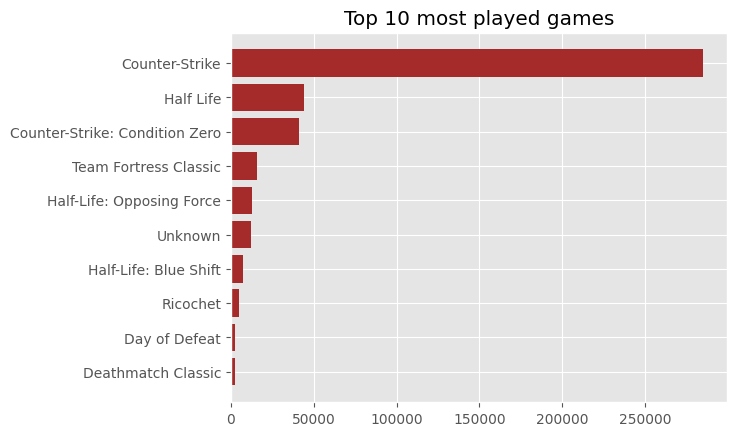

In [13]:
plt.style.use("ggplot")
plt.barh(df_tp10_item["item_name"],df_tp10_item["hours_game"],color="brown")
plt.title("Top 10 most played games")

In [14]:
#Top players
df_user=df.groupby("user_id")["hours_game"].sum().reset_index()

In [15]:
df_user.head(5)

,user_id,hours_game
0,--000--,2350.43
1,--ace--,1173.01
2,--ionex--,801.41
3,-2SV-vuLB-Kg,904.14
4,-404PageNotFound-,3854.38


In [16]:
df_tp10_users=df_user.loc[0:9,:]

In [18]:
df_tp10_users.sort_values(by="hours_game",ascending=True,inplace=True)

C:\Users\diego\AppData\Local\Temp\ipykernel_3624\1276865962.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tp10_users.sort_values(by="hours_game",ascending=True,inplace=True)


C:\Users\diego\AppData\Local\Temp\ipykernel_3624\3361611151.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


Text(0.5, 1.0, 'Top 10 players')

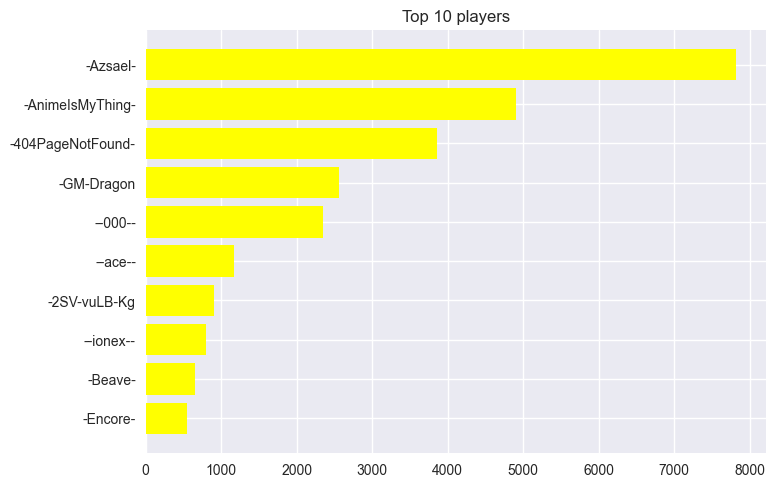

In [20]:
plt.style.use("seaborn")
plt.barh(df_tp10_users["user_id"],df_tp10_users["hours_game"],color="yellow")
plt.title("Top 10 players")